In [1]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
  !wget -O basic_material.py https://www.dropbox.com/s/3aoexl8vxyitmds/basic_material.py?dl=0
%run basic_material

import time, csv, os, requests
 
from os import path
if os.path.isdir("./data/"):
    pass
else:
    !mkdir ./data
    
if os.path.isdir("./figs/"):
    pass
else:
    !mkdir ./figs

try:
    from qpsolvers import solve_qp
except:
    !python3 -m pip install qpsolvers
    from qpsolvers import solve_qp
#https://scaron.info/doc/qpsolvers/quadratic-programming.html
#https://osqp.org/docs/get_started/sources.html

Running Python: 3.8.12


$$
min_x ~~\frac{1}{2} x^T P x + q^T x
$$
such that
$$
G x \leq h
$$
$$
A x  = b
$$
$$
lb \leq x \leq ub
$$


In [2]:
P = np.array([[2, 0.], [0, 2.]])
G = np.array([[1., 1.],[-4., -1.]])
h = np.array([-1.0,8.0]).reshape((2,))

sol = solve_qp(P, 0*h, G, h)
print(f"QP solution: x = {sol}")

QP solution: x = [-0.5000 -0.5000]


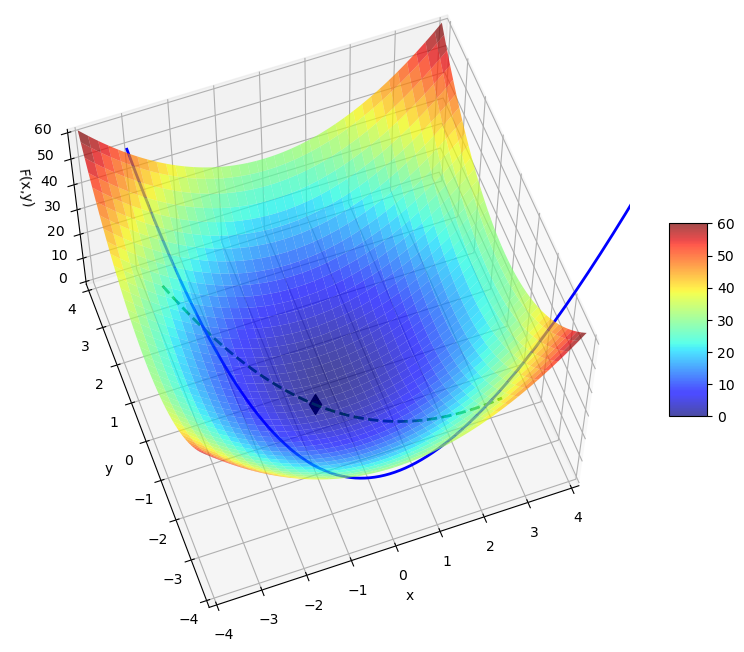

In [3]:
def F(X):
    x,y = X
    return 2*x**2 + 2*y**2

# Show solution paths in a surface plot
x = np.arange(-4, 4, 0.05)
y = np.arange(-4, 4, 0.05)
X, Y = np.meshgrid(x, y)
Z = F([X, Y])

# set up the figure
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.azim = -110
ax.dist = 10
ax.elev = 60
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("F(x,y)")

# plot the figure
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet, alpha = 0.7, vmin=0, vmax=60)
fig.colorbar(surf, shrink=0.25, aspect=5)
plt.autoscale(False)

x1 = np.arange(-3,2.5,.01)
ax.plot(sol[0],sol[1],F(sol),'kd',ms=10)
ax.plot(x1,-1-x1,F([x1,-1-x1]),'g--')
ax.plot(x1,-8-4*x1,F([x1,-8-4*x1]),'b')
ax.set_zlim([0, 60])
plt.savefig("figs/QP_1.png")
plt.show()